# `EDA Homework`

- ### Imports

In [39]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

- ### Load Data

In [40]:
# Load Data
df = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'superstore.csv'), encoding="latin1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [126]:
# modify column names for easier access
df.columns = df.columns.str.replace(' ', '_').str.lower().str.strip().str.replace('-', '_')

In [42]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

- ### Basic Exploration

In [43]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [44]:
df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [45]:
df.shape

(9994, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub-category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

#### concluded that no NaNs in dataset

- #### drop unnecessary columns

In [47]:
df.columns.value_counts().sum()

np.int64(21)

In [48]:
# drop unnecessary columns
df.drop(columns=['row_id', 'order_id', 'product_id'], inplace=True)

# postal code may relate to customer location, so we will keep it  -> treat it as a categorical variable
# costumer_id may be useful for customer segmentation, so we will keep it  -> treat it as a categorical variable
# costumer_name corresponds to customer_id may use later for personalization, so we will keep it

In [49]:
# check
df.columns.value_counts().sum()

np.int64(18)

In [50]:
# describe for numerical columns
df.drop(columns=['postal_code']).describe()     # .drop() -> inplace = False by default

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


- profits feature seems to have outliers 
- min is large negative values -> ig its wrong data entery 

In [51]:
df["profit"].mean(), df["profit"].median()

(np.float64(28.65689630778467), np.float64(8.6665))

- ( mean >> median ) -> right skewed

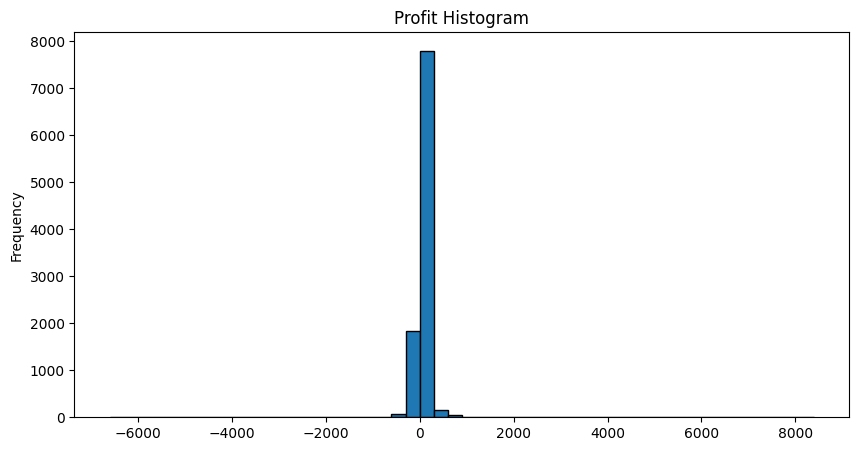

In [52]:
df["profit"].plot(kind='hist', figsize=(10, 5), title='Profit Histogram', bins=50, edgecolor='black')
plt.show()

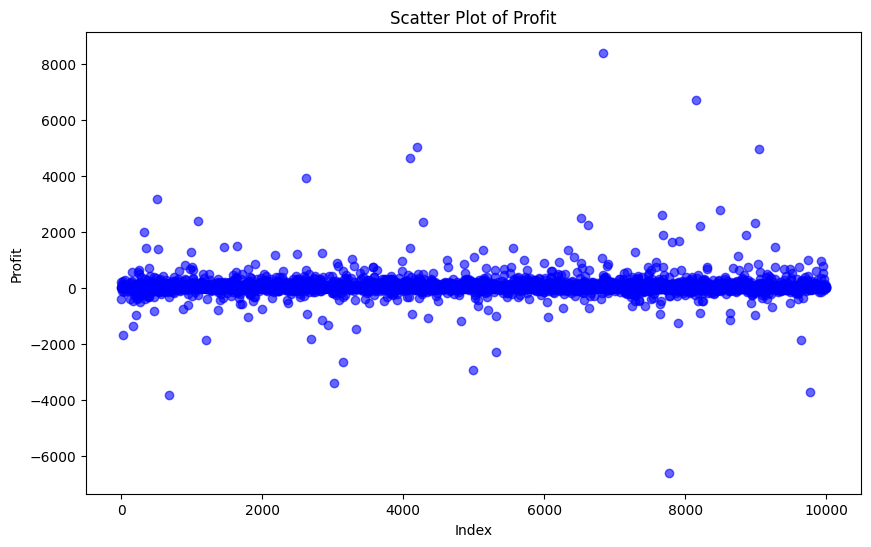

In [53]:
# scatte plot of profit 

plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['profit'])), df['profit'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Profit')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.show()


most of data arount zero 

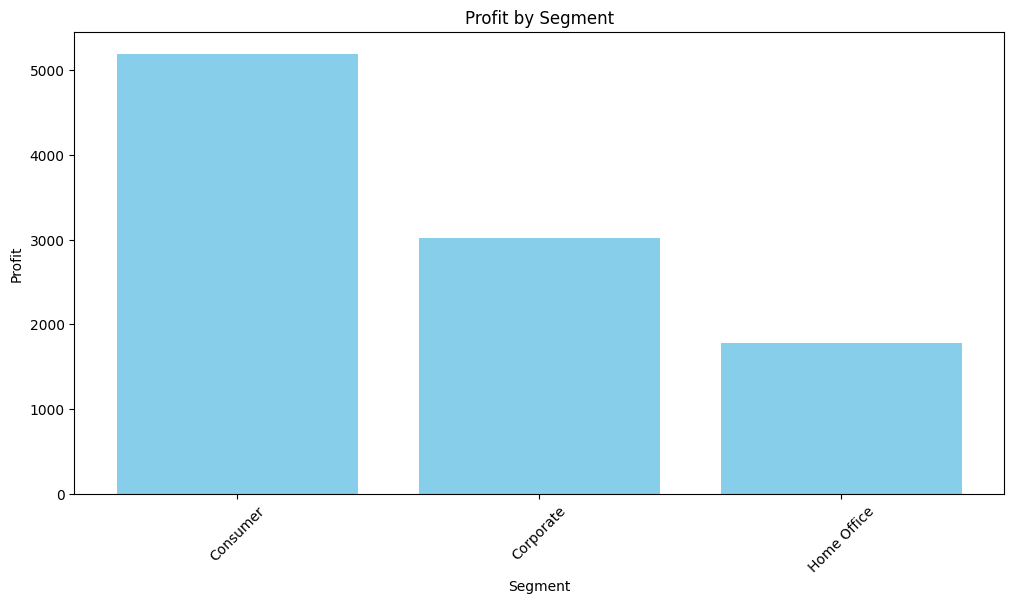

In [54]:
# vizualize profit by segment
plt.figure(figsize=(12, 6))
plt.bar(df['segment'].value_counts().index, df['segment'].value_counts().values, color='skyblue')
plt.title('Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


In [55]:
# return large profit 
df[df['profit'] > 1000].shape

(42, 18)

In [56]:
# percentage of large profit 
len(df[df['profit'] > 1000]) / len(df) * 100

0.4202521512907745

In [57]:
# return large negative profit 
df[df['profit'] < -100].shape  


(311, 18)

In [58]:
# percentage of large negative profit 
len(df[df['profit'] < -100]) / len(df) * 100  # percentage of negative profits

3.111867120272163

- ### check duplicates

In [59]:
df.duplicated().sum()  # check duplicates

np.int64(1)

In [60]:
df.drop_duplicates(inplace=True)  # drop duplicates

- ### Encoding

In [61]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'category', 'sub-category', 'product_name', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


- ### Questions

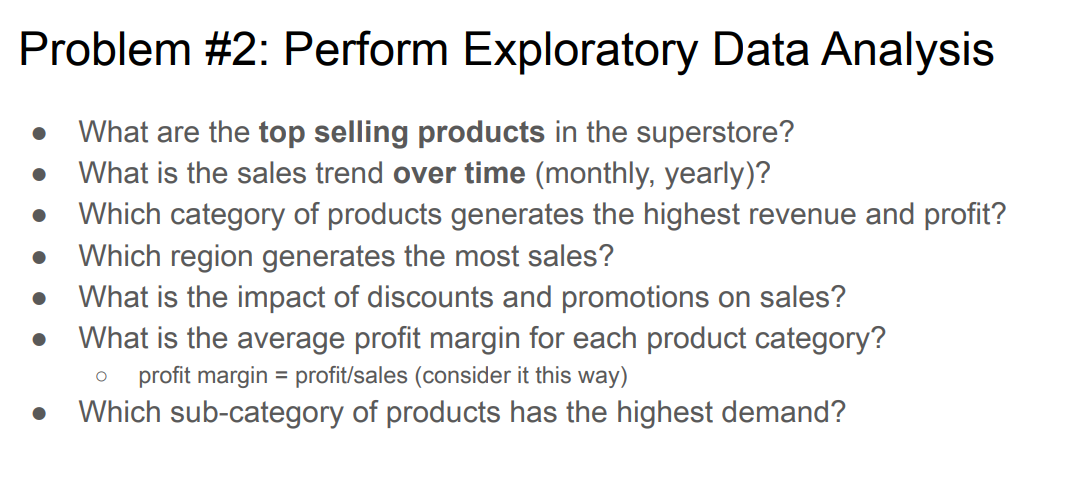


`1. top selling products`

In [62]:
df.groupby(by=["product_name"])["profit"].sum().sort_values(ascending=False).head(10)

product_name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: profit, dtype: float64

In [63]:
# vizualize profit per product 

`2. sales trends over time (monthly, yearly)`

In [64]:
df["order_date"]

0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9989     1/21/2014
9990     2/26/2017
9991     2/26/2017
9992     2/26/2017
9993      5/4/2017
Name: order_date, Length: 9993, dtype: object

In [70]:
# convert order_date to datetime 
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
print(df["order_date"].dtype)

datetime64[ns]


In [72]:
df["order_date"]

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: order_date, Length: 9993, dtype: datetime64[ns]

In [66]:
# 2. Extract day, month & year
df['Year'] = df['order_date'].dt.year
df['Month'] = df['order_date'].dt.month
df['Day'] = df['order_date'].dt.day

In [67]:
df.head()

,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,...,category,sub-category,product_name,sales,quantity,discount,profit,Year,Month,Day
0,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


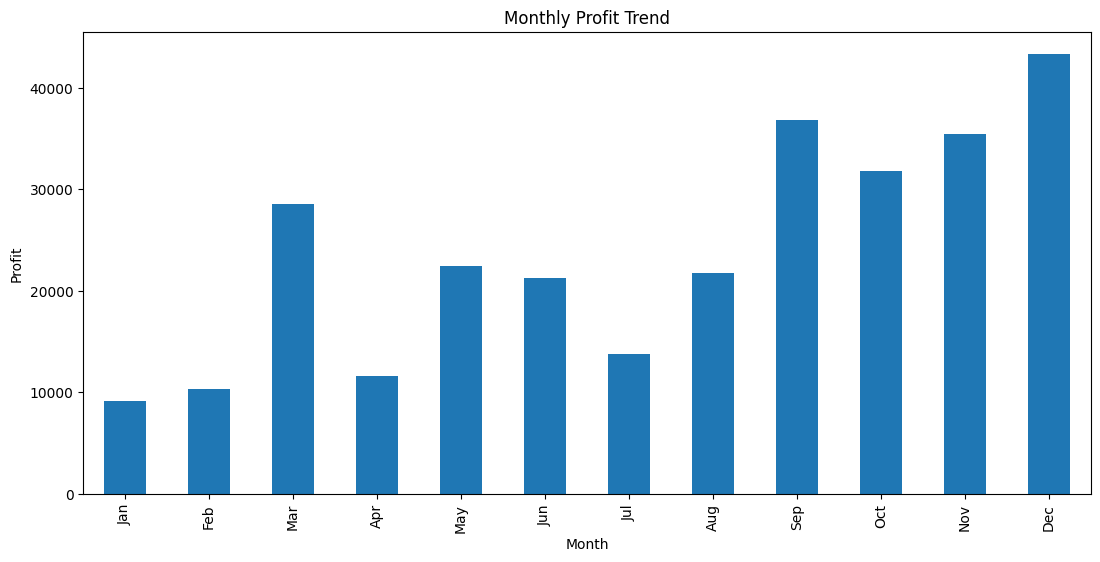

In [79]:
# sales trends per month
df.groupby("Month")["profit"].sum().sort_index().plot(
    kind='bar', figsize=(13, 6), title='Monthly Profit Trend'
)
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


- sales tends to increase at the end of the year 

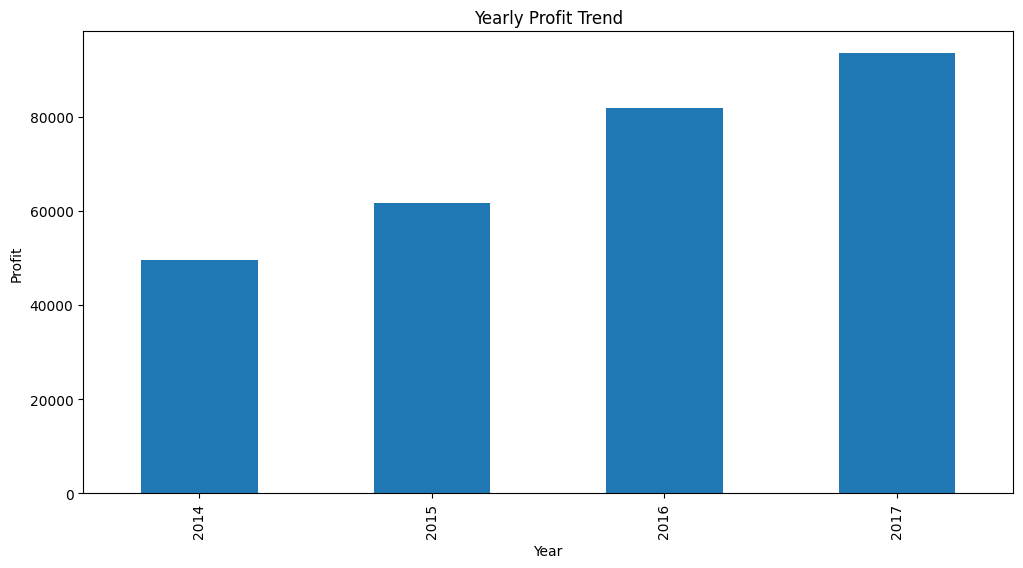

In [ ]:
# sales trends per year
df.groupby("Year")["profit"].sum().sort_index().plot(
    kind='bar', figsize=(12, 6), title='Yearly Profit Trend'
)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

`3. category with highest revenue(sales) and profit`

In [81]:
# category with highest revenue(sales) 
df.groupby("category")["sales"].sum().sort_values(ascending=False).head()

category
Technology         836154.0330
Furniture          741718.4233
Office Supplies    719047.0320
Name: sales, dtype: float64

In [83]:
# category with highest profit
df.groupby("category")["profit"].sum().sort_values(ascending=False).head()

category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18463.3316
Name: profit, dtype: float64

- Technology category ranks first in both sales and profit.

- Although Furniture has higher sales than Office Supplies, its profit is significantly lower.

- This indicates that Office Supplies has better profitability despite having less sales compared to Furniture.

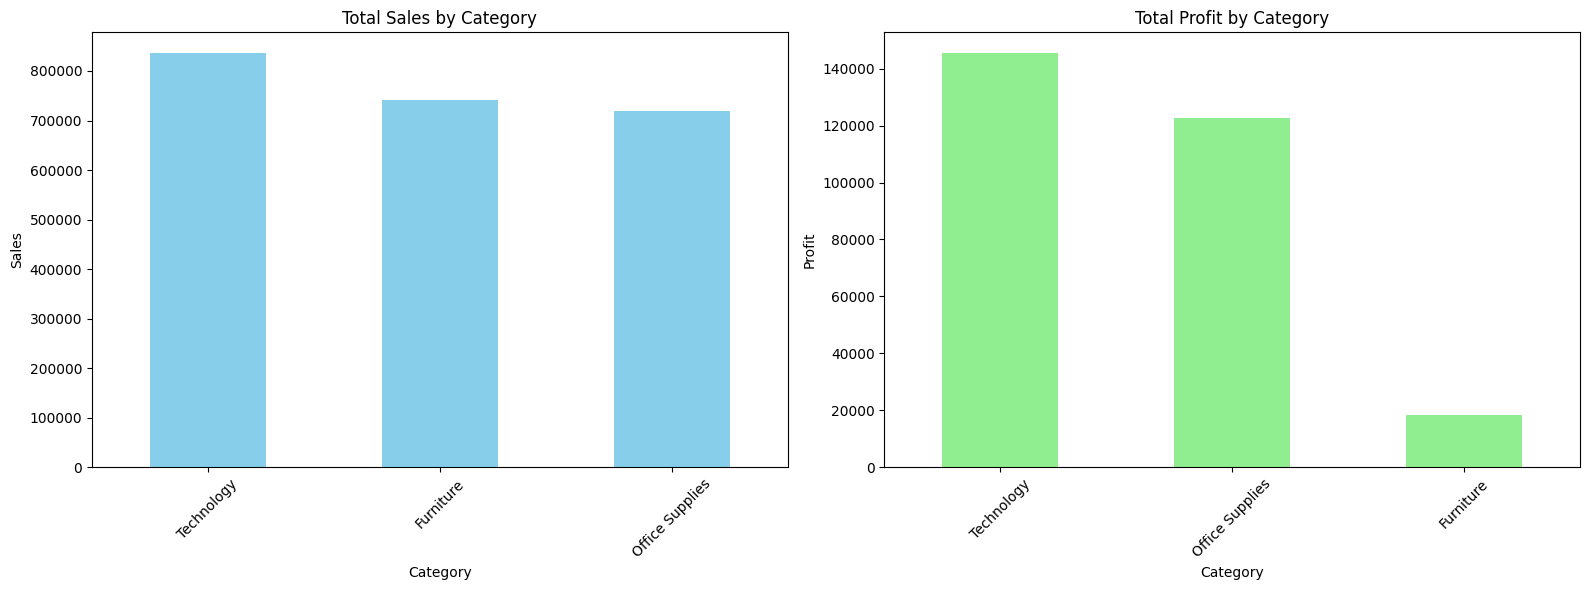

In [84]:
# Aggregate data
sales_by_category = df.groupby("category")["sales"].sum().sort_values(ascending=False)
profit_by_category = df.groupby("category")["profit"].sum().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot sales
sales_by_category.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot profit
profit_by_category.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Total Profit by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- #### considering sales they are all close, put the profitability of Furniture is too low

`4. Regions with highest sales`

In [85]:
# regions with highest sales
df.groupby("region")["sales"].sum().sort_values(ascending=False).head()

region
West       725457.8245
East       678499.8680
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64

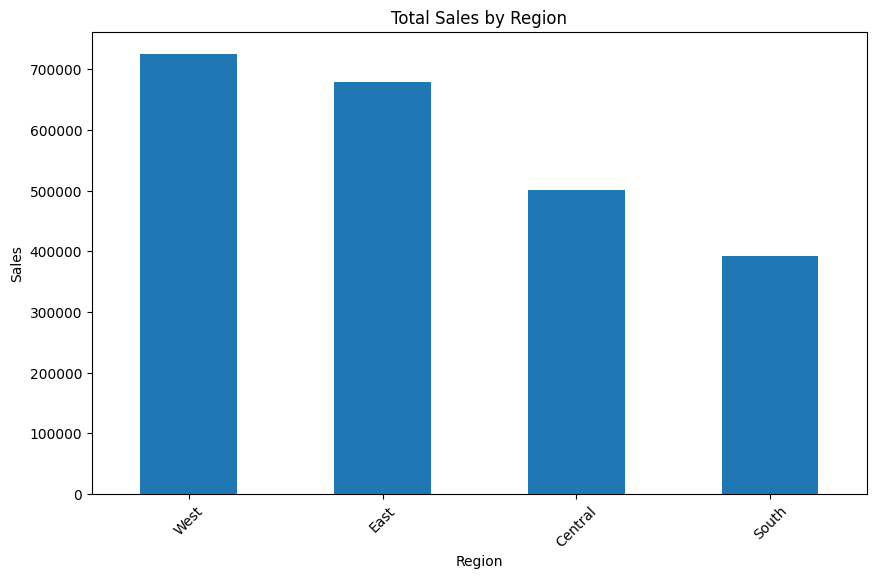

In [88]:
# vizualize sales by region
plt.figure(figsize=(10, 6))
df.groupby("region")["sales"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

- west region generates the highest sales

`5. What is the impact of discounts and promotions on sales?`

In [ ]:
print(df["discount"].nunique(),'\n') 
print("available discounts")
print(df["discount"].unique().reshape(-1,1))

12 

available discounts
[[0.  ]
 [0.45]
 [0.2 ]
 [0.8 ]
 [0.3 ]
 [0.5 ]
 [0.7 ]
 [0.6 ]
 [0.32]
 [0.1 ]
 [0.4 ]
 [0.15]]


In [111]:
df['discount'].value_counts()

discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

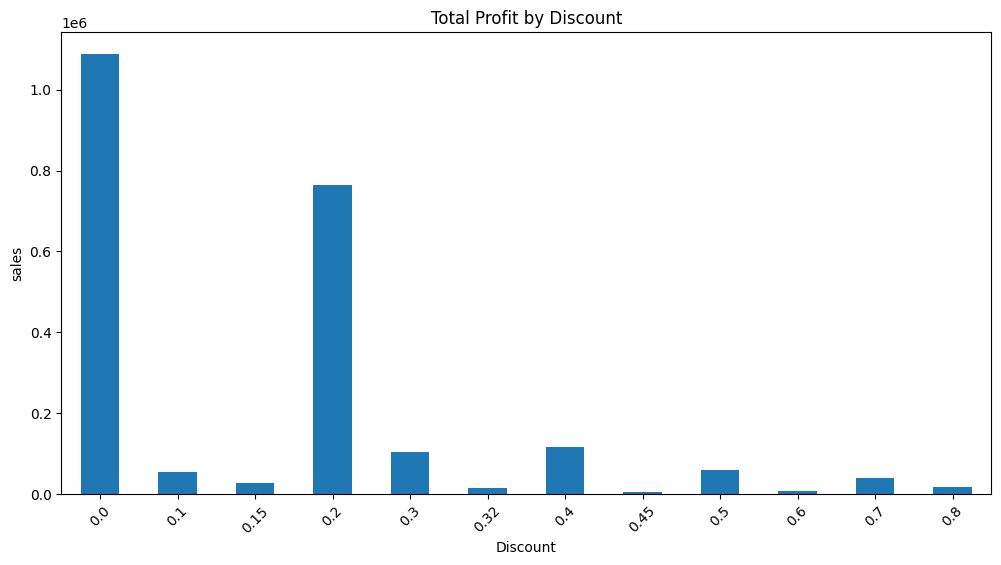

In [114]:
# vizualize sales by discount, scatter plot and drop zero discount
plt.figure(figsize=(12, 6))
df.groupby("discount")["sales"].sum().plot(kind='bar')
plt.title('Total Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('sales')
plt.xticks(rotation=45)
plt.show()


- certain dicounts has high sales, but this isnt representive we must consider number of times each discount was applied

In [119]:
# Count transactions per discount
discount_counts = df['discount'].value_counts().sort_index()

# Total sales per discount
sales_by_discount = df.groupby('discount')['sales'].sum().sort_index()

# Average sales per discount (more representative)
avg_sales_per_discount = sales_by_discount / discount_counts

print("Average Sales per Discount:")
print(avg_sales_per_discount.sort_values(ascending=False))


Average Sales per Discount:
discount
0.50    892.705152
0.10    578.397351
0.40    565.134874
0.32    536.794770
0.15    529.971567
0.45    498.634000
0.30    455.510102
0.00    226.742074
0.20    209.076940
0.70     97.177708
0.80     56.545853
0.60     48.150000
dtype: float64


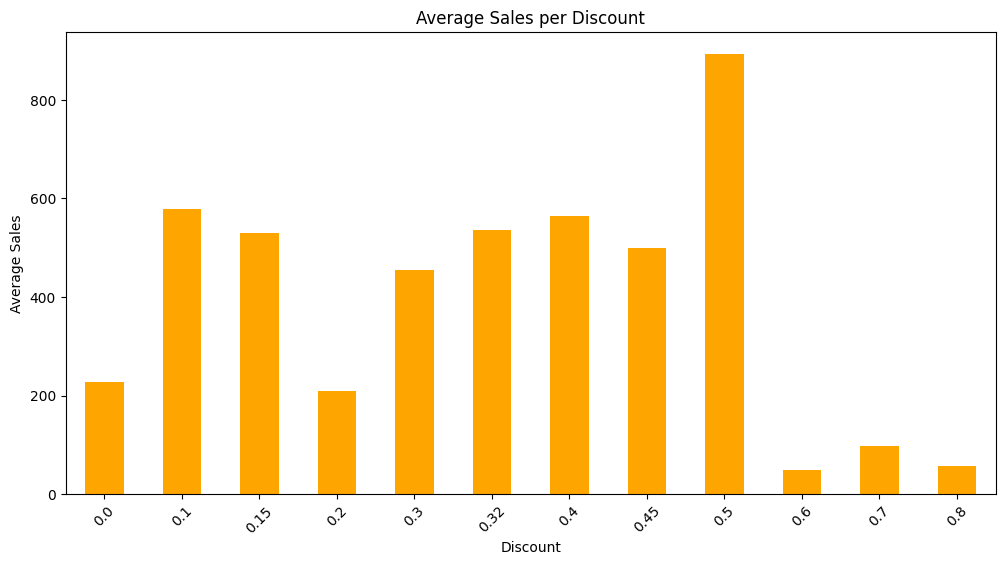

In [118]:
# plot average sales per discount
plt.figure(figsize=(12, 6))
avg_sales_per_discount.plot(kind='bar', color='orange')
plt.title('Average Sales per Discount')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


- 50% has the highest average sales

- `What is the average profit margin for each product category?`

In [122]:
# average profit margin per category
avg_profit_margin_per_category = df.groupby("category")["profit"].sum() / df.groupby("category")["sales"].sum()
print("Average Profit Margin per Category:")
print(avg_profit_margin_per_category.sort_values(ascending=False))

Average Profit Margin per Category:
category
Technology         0.173957
Office Supplies    0.170352
Furniture          0.024893
dtype: float64


In [125]:
df.head()

,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,...,category,sub-category,product_name,sales,quantity,discount,profit,Year,Month,Day
0,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


- `Which sub-category of products has the highest demand?`


In [136]:
# Which sub-category of products has the highest demand?
top_sub_categories= df.groupby("sub_category")["sales"].sum().sort_values(ascending=False)
print("Top 10 Sub-Categories by Sales:")
top_sub_categories.head(10)

Top 10 Sub-Categories by Sales:


sub_category
Phones         330007.0540
Chairs         328167.7310
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: sales, dtype: float64

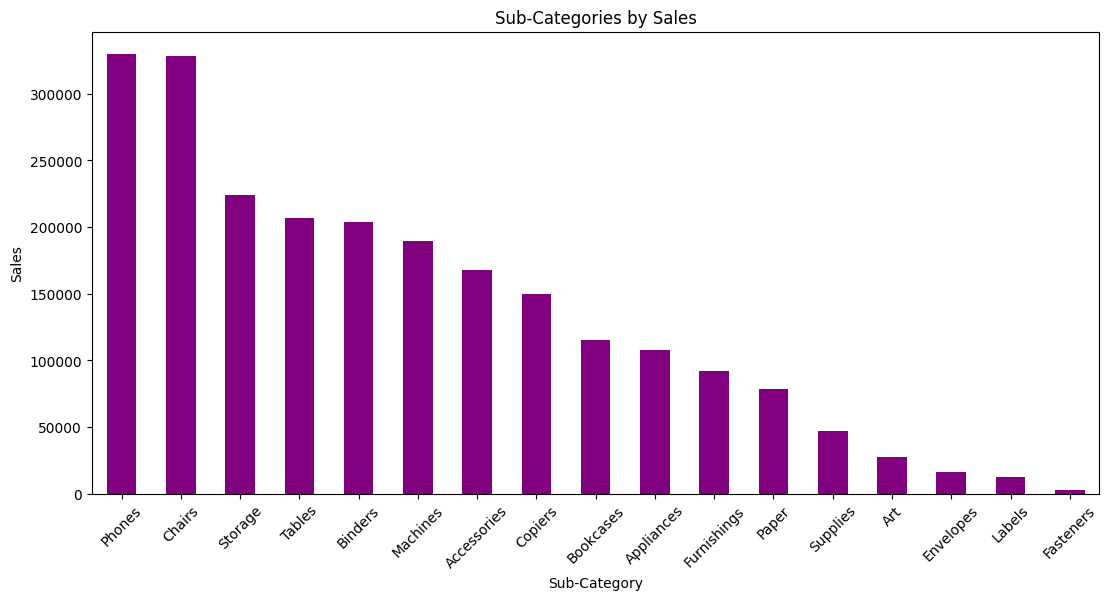

In [139]:
# vizualize sales per sub-category
plt.figure(figsize=(13, 6))
top_sub_categories.plot(kind='bar', color='purple')
plt.title('Sub-Categories by Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()
